In [1]:
%pip install opencv-python tensorflow kagglehub

In [2]:
import kagglehub

path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:06<00:00, 68.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [4]:
import os
for folder in os.listdir(path):
    print(folder, ":", os.listdir(os.path.join(path, folder))[:5])  # Show first 5 files in each folder


dataset : ['DATASET']
DATASET : ['TEST', 'TRAIN']


In [5]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model


In [6]:
from glob import glob
from cv2 import cvtColor, imread, COLOR_BGR2RGB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [10]:
train_path=f'{path}/DATASET/TRAIN'
test_path=f'{path}/DATASET/TEST'

In [11]:
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = imread(file)
        img_array = cvtColor(img_array, COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})


100%|██████████| 9999/9999 [00:04<00:00, 2189.99it/s]


In [12]:
data.shape

(22564, 2)

In [13]:
data.head()

,image,label
0,"[[[180, 166, 153], [163, 149, 138], [145, 131,...",O
1,"[[[172, 38, 45], [172, 38, 45], [173, 39, 46],...",O
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",O
3,"[[[227, 76, 93], [223, 72, 89], [217, 69, 85],...",O
4,"[[[189, 179, 152], [188, 178, 151], [188, 176,...",O


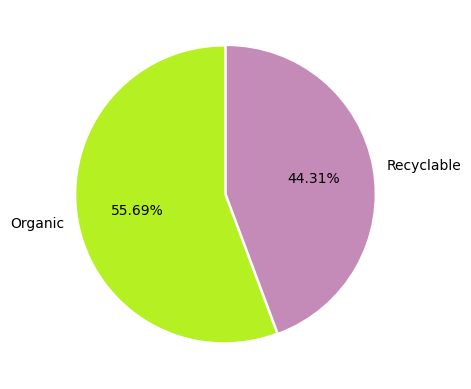

In [14]:
colors = ['#ae0d', '#c48bb8']
plt.pie(data.label.value_counts(),
        labels=['Organic', 'Recyclable'],
        autopct='%0.2f%%',
        colors=colors,
        startangle=90,
        explode=[0.009, 0.009])
plt.show()

In [24]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [28]:
hist = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 94s 772ms/step - accuracy: 0.7255 - loss: 0.6597 - val_accuracy: 0.8858 - val_loss: 0.3451
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 553ms/step - accuracy: 0.8186 - loss: 0.4326 - val_accuracy: 0.8774 - val_loss: 0.3079
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 558ms/step - accuracy: 0.8453 - loss: 0.3848 - val_accuracy: 0.8743 - val_loss: 0.3404
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 557ms/step - accuracy: 0.8578 - loss: 0.3598 - val_accuracy: 0.8961 - val_loss: 0.2842
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 559ms/step - accuracy: 0.8629 - loss: 0.3349 - val_accuracy: 0.8782 - val_loss: 0.3213
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 557ms/step - accuracy: 0.8746 - loss: 0.3136 - val_accuracy: 0.8961 - val_loss: 0.2935
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 546ms/step - accuracy: 0.8886 - loss: 0.2809 - val_accuracy: 0.8922 - val_loss: 0.3032
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 559ms/step - accuracy: 0.8949 - loss: 0.2638 - val_accu

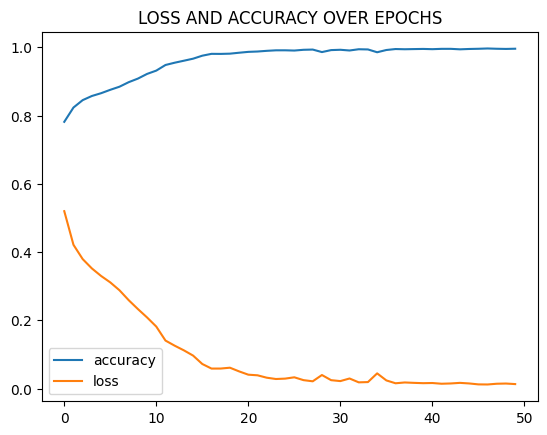

In [29]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.title("LOSS AND ACCURACY OVER EPOCHS")
plt.legend()
plt.show()

In [34]:
loss, accuracy = model.evaluate(train_generator)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Loss: {loss:.4f}")

89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 453ms/step - accuracy: 0.9997 - loss: 0.0015
Accuracy: 99.98%
Loss: 0.0014
